# Hamilton matrices for 2D spin models

We can re-use the Hamiltonian-construction algorithm for the 2D case. By labeling the sites and adding the right interaction terms in the J-matrices, a multi dimensional model can be emulated.

In [19]:
#import Pkg; Pkg.add("Arpack")

In [42]:
using LinearAlgebra, SparseArrays, DelimitedFiles, Arpack, Plots

#Including the functions to construct a Hamiltonian and calculate the entanglement entropy
include("functions.jl") #MakeHam, RedDens, EntEntr, PopMul, BinDec

┌ Info: Recompiling stale cache file /opt/julia/share/julia/site/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


Now define J matrices and find the corresponding hamiltonian.

In [54]:
#=
#Ising model
N=3
jmat = zeros(Int8, N, N, 3);
for i in 1:N-1
    jmat[i,i+1,3]=jmat[i+1,i,3]=-1
end
mat1=MakeHam(jmat)
mat1=#


#Heisenberg
N=8
jmat = zeros(Int8, N, N, 3);
for i in 1:N-1
    for a in 1:3
        jmat[i,i+1,a]=jmat[i+1,i,a]=1
    end
end

mat2=MakeHam(jmat);


## (Ising) model, eigensystem

In [43]:
eigens=eigs(mat2)

┌ Warning: Adjusting nev from 6 to 3
└ @ Arpack /opt/julia/share/julia/site/packages/Arpack/cu5By/src/Arpack.jl:99


([-1.5, 1.0, 1.0], [5.55112e-17 0.55943 -0.828878; 0.707107 0.0 -2.77556e-17; -0.707107 1.11022e-16 0.0; -1.11022e-16 -0.828878 -0.55943], 3, 1, 4, [0.0, 0.0, 0.0, 0.0])

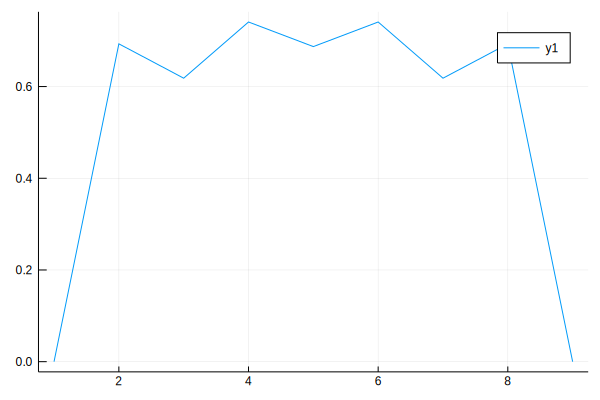

In [55]:
mat2=Matrix(mat2)
gndst=eigvecs(mat2)[:,1]


data = Array{Float32}(undef, N+1)
for i in 0:N
    data[i+1] = EntEntr(gndst,collect(1:i))
end
plot(data)